In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [67]:
df=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [68]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [70]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**No Missing Values**

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


**Class Distribution**

In [72]:
df['Class'].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

**Class is imbalanced**

<Axes: xlabel='Class'>

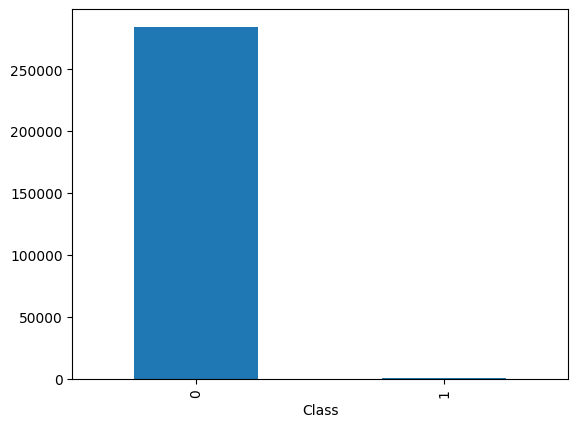

In [73]:
df['Class'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

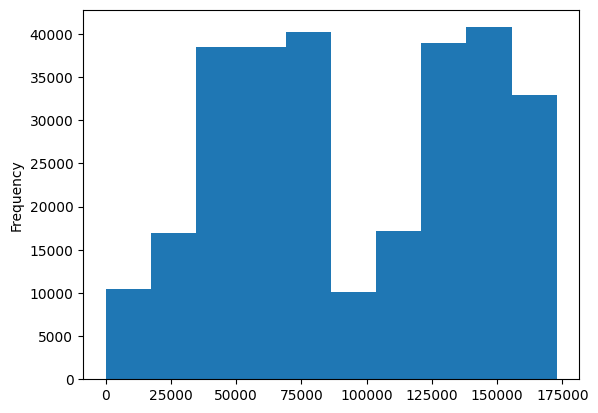

In [74]:
df['Time'].plot(kind='hist')

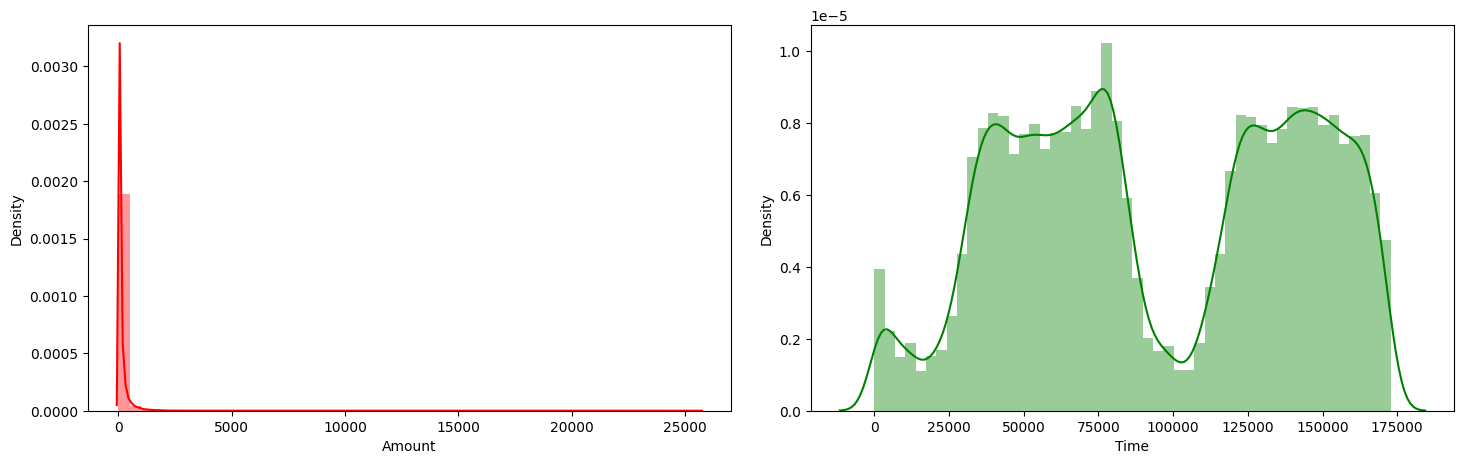

In [75]:
row,col=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['Amount'],ax=col[0],color='r')
sns.distplot(df['Time'],ax=col[1],color='g')
plt.tight_layout(pad=2.0)
plt.show()

In [76]:
from sklearn.preprocessing import RobustScaler
rob_scaler=RobustScaler()

In [77]:
## RobustScaler is less effected by outliers ...(Time and Amount have outliers)

df['scaled_time']=rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['scaled_amount']=rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [78]:
df.drop({'Time','Amount'},inplace=True,axis=1)

In [79]:
df.insert(0, 'scaled_time', df.pop('scaled_time'))
df.insert(1, 'scaled_amount', df.pop('scaled_amount'))

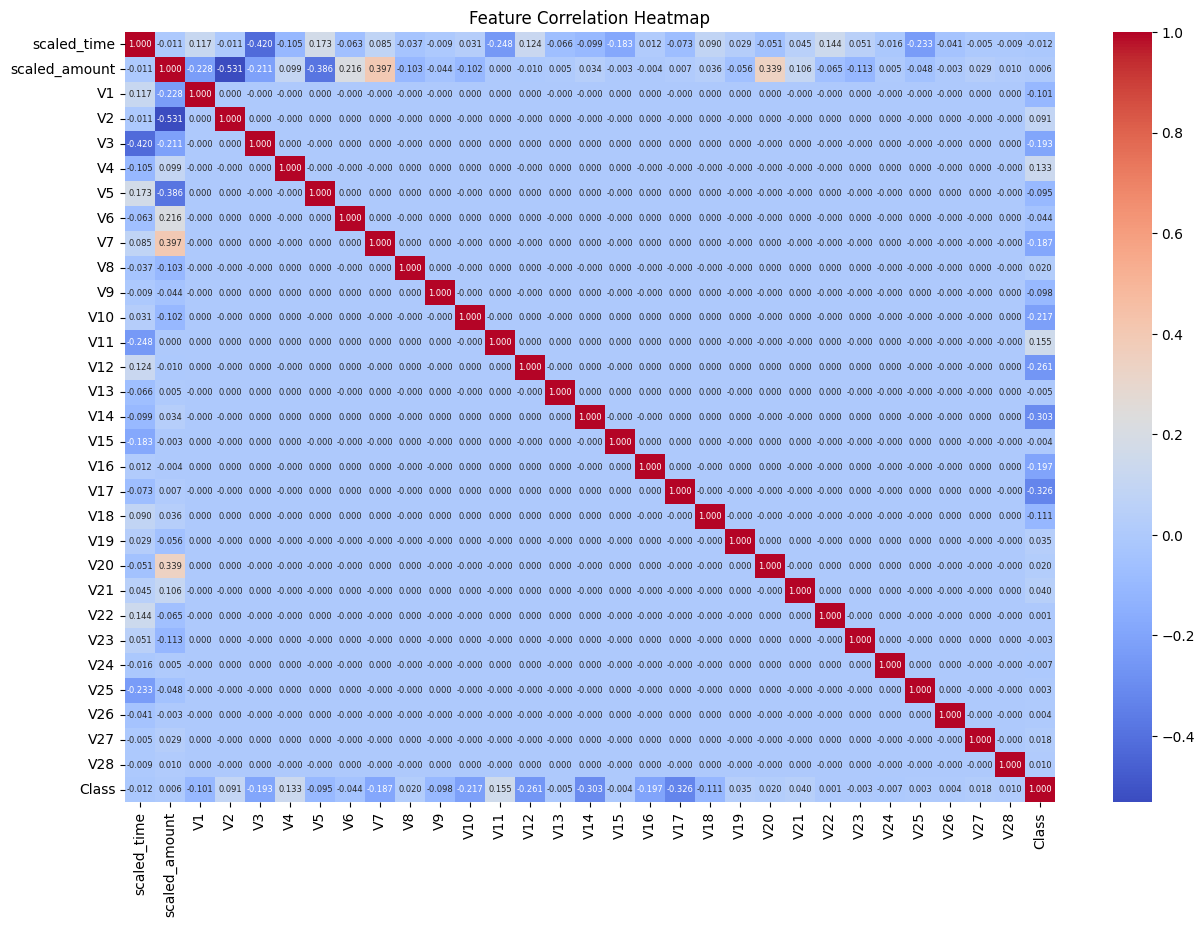

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method="pearson"),cmap="coolwarm",annot=True,annot_kws={"size": 6},fmt=".3f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [81]:
df.corr().columns

Index(['scaled_time', 'scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [82]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [83]:
X = df.drop('Class', axis=1)
y = df['Class']

In [84]:
f_values, p_values = f_classif(X, y)

In [85]:
selector=SelectKBest(score_func=f_classif, k='all')
X_new = selector.fit_transform(X, y)

In [87]:
selector.scores_

array([4.32529978e+01, 9.03334471e+00, 2.95566895e+03, 2.39340168e+03,
       1.10145083e+04, 5.16383211e+03, 2.59235793e+03, 5.43510578e+02,
       1.03496054e+04, 1.12548287e+02, 2.74660027e+03, 1.40579800e+04,
       6.99935505e+03, 2.07498224e+04, 5.94767235e+00, 2.86955478e+04,
       5.08019349e+00, 1.14433494e+04, 3.39791686e+04, 3.58438061e+03,
       3.44990997e+02, 1.14999731e+02, 4.65916251e+02, 1.84706496e-01,
       2.05347633e+00, 1.48509325e+01, 3.11606176e+00, 5.65365293e+00,
       8.80452963e+01, 2.59014046e+01])

In [91]:
ANOVA_DF=pd.DataFrame(data=selector.scores_,index=X.columns,columns=['ANOVA_SCORE'])

In [95]:
ANOVA_DF.head(30).sort_values(ascending = False,by='ANOVA_SCORE')

,ANOVA_SCORE
V17,33979.168593
V14,28695.547788
V12,20749.822361
V10,14057.979985
V16,11443.349428
V3,11014.508305
V7,10349.605408
V11,6999.355047
V4,5163.832114
V18,3584.380605


**Selecting only feature with ANOVA score >600**

In [146]:
ANOVA_DF[ANOVA_DF['ANOVA_SCORE']>88].index

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27'],
      dtype='object')

In [147]:
df_reduced=df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27','Class']]

In [148]:
df_reduced.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V14,V16,V17,V18,V19,V20,V21,V27,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422,0


In [149]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [171]:
X_reduced=df_reduced.drop('Class',axis=1)
y_reduced=df_reduced['Class']

In [172]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_reduced,y_reduced,test_size=0.2,random_state=42)

In [174]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)

In [175]:
steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X_reduced_smote, y_reduced_smote = pipeline.fit_resample(x_train, y_train)

In [176]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(X_reduced_smote,y_reduced_smote,test_size=0.2,random_state=42)

In [178]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [179]:
from sklearn.linear_model import LogisticRegression
logi_model=LogisticRegression()
logi_model.fit(x_train1,y_train1)
y_predict=logi_model.predict(x_test1)
print("LogisticRegression Results")
print("ROC_AUC Score : ",(roc_auc_score(y_predict,y_test1)))
print(classification_report(y_predict,y_test1))
print("="*60)

LogisticRegression Results
ROC_AUC Score :  0.9660381184103812
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       822
           1       0.91      0.97      0.94       360

    accuracy                           0.96      1182
   macro avg       0.95      0.97      0.96      1182
weighted avg       0.97      0.96      0.96      1182



In [180]:
from sklearn.svm import SVC
scv_model=SVC()
scv_model.fit(x_train1,y_train1)
y_pred=scv_model.predict(x_test1)
print("SVC Results")
print("ROC_AUC Score : ",(roc_auc_score(y_pred,y_test1)))
print(classification_report(y_pred,y_test1))
print("="*60)

SVC Results
ROC_AUC Score :  0.9732338444687844
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       830
           1       0.91      0.99      0.95       352

    accuracy                           0.97      1182
   macro avg       0.95      0.97      0.96      1182
weighted avg       0.97      0.97      0.97      1182



In [181]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt_model.fit(x_train1,y_train1)
y_predict=dt_model.predict(x_test1)
print("Decision Tree Classifier Results")
print("ROC_AUC Score : ",(roc_auc_score(y_predict,y_test1)))
print(classification_report(y_predict,y_test1))
print("="*60)

Decision Tree Classifier Results
ROC_AUC Score :  0.957330548443606
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       820
           1       0.91      0.96      0.93       362

    accuracy                           0.96      1182
   macro avg       0.94      0.96      0.95      1182
weighted avg       0.96      0.96      0.96      1182



In [182]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth = 4,random_state = 0)
rf_model.fit(x_train1,y_train1)
y_predict=rf_model.predict(x_test1)
print("RandomForestClassifier Results")
print("ROC_AUC Score : ",(roc_auc_score(y_predict,y_test1)))
print(classification_report(y_predict,y_test1))
print("="*60)

RandomForestClassifier Results
ROC_AUC Score :  0.9724011457314518
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       842
           1       0.89      1.00      0.94       340

    accuracy                           0.96      1182
   macro avg       0.94      0.97      0.96      1182
weighted avg       0.97      0.96      0.96      1182



In [183]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
knn_model.fit(x_train1,y_train1)
y_pred=knn_model.predict(x_test1)
print("KNeighborsClassifier Results")
print("ROC_AUC Score : ",(roc_auc_score(y_pred,y_test1)))
print(classification_report(y_pred,y_test1))
print("="*60)

KNeighborsClassifier Results
ROC_AUC Score :  0.9803299492385787
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       788
           1       0.99      0.96      0.98       394

    accuracy                           0.99      1182
   macro avg       0.99      0.98      0.98      1182
weighted avg       0.99      0.99      0.99      1182

